In [37]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd
start_time = time.time()

for i in range(9):
    #c=np.random.randint(1,39,size=(100000,5))
    c=np.random.randint(1,39,size=(10000,5))
    ind=[]
    for j in c:
        if len(set(j))==5:
            ind.append(j.tolist())
            df=pd.DataFrame(ind)
            df.columns=['c1','c2','c3','c4','c5']
            #df.to_parquet(f'./data/df_{i}.parquet.gzip',compression='gzip')
            df.to_csv(f'./data/df_{i}.csv',index=False)
    print((c.shape[0]-len(ind))/c.shape[0]*100)

print("--- %s seconds ---" % (time.time() - start_time)) 

23.71
24.62
24.19
24.36
23.68
24.32
24.03
23.75
24.29
--- 1231.2424886226654 seconds ---


In [38]:
import os
merged_df=pd.DataFrame(columns=['c1','c2','c3','c4','c5'])
data_folder_path = os.path.join(os.getcwd(), 'data')
csv_file_paths = [os.path.join(data_folder_path, f) for f in os.listdir(data_folder_path) if f.endswith('.csv')]
for path  in csv_file_paths:
  df=pd.read_csv(path)
  merged_df = merged_df.append(df)


In [39]:
merged_df

,c1,c2,c3,c4,c5
0,21,17,32,14,7
1,36,7,25,2,19
2,17,8,4,16,10
3,2,18,25,5,4
4,26,30,8,21,18
...,...,...,...,...,...
7566,27,7,35,17,13
7567,27,2,15,37,13
7568,25,9,4,18,23
7569,38,14,3,32,21


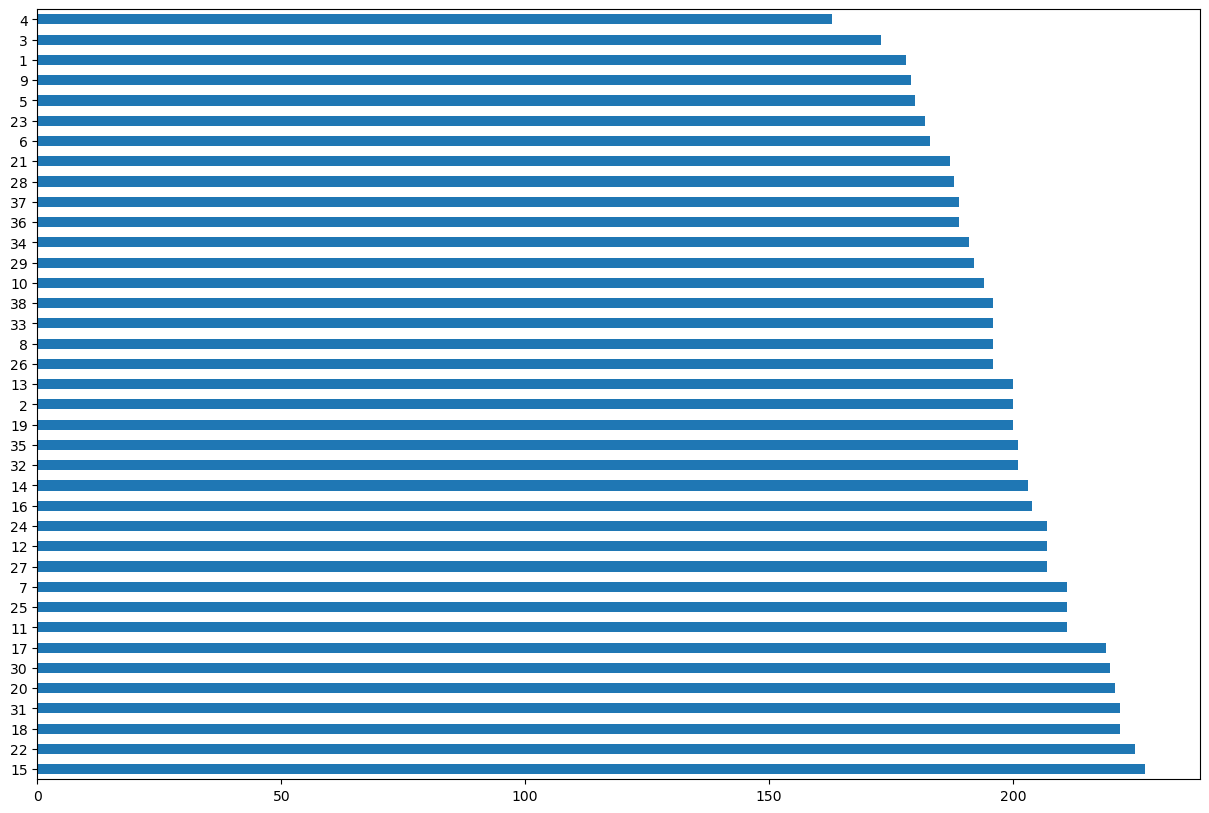

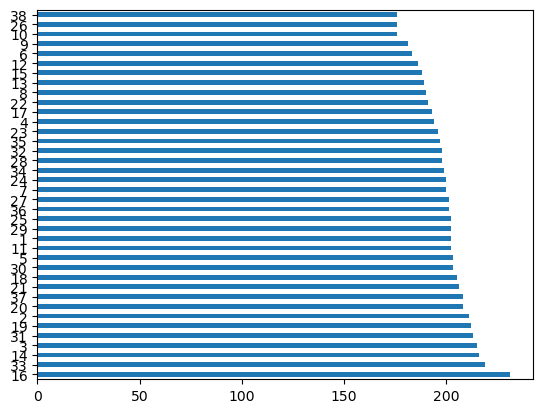

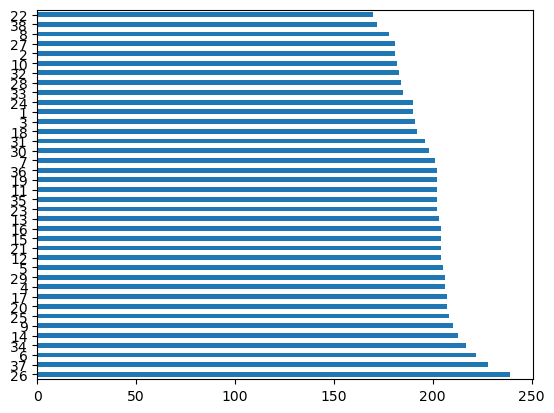

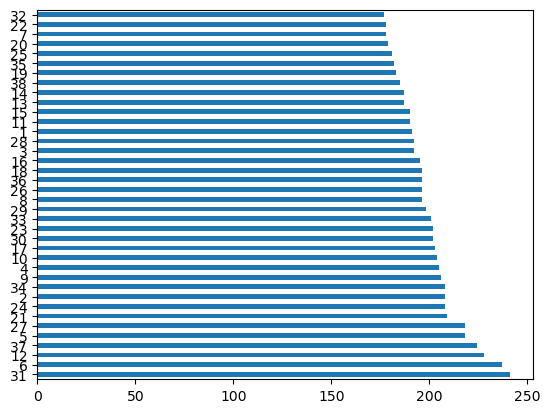

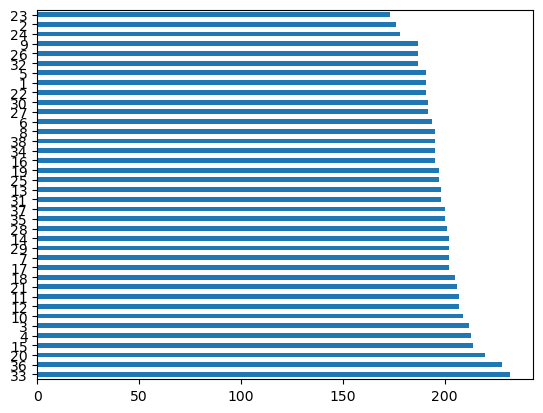

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i in merged_df.columns:
    df[i].value_counts().plot(kind='barh')
    plt.show()

In [44]:
merged_df.value_counts()

c1  c2  c3  c4  c5
33  15  16  1   36    2
30  32  34  23  29    2
4   19  11  17  7     2
    24  21  11  31    2
3   28  11  16  24    2
                     ..
13  31  24  34  14    1
        25  18  27    1
        28  17  14    1
        29  24  8     1
38  37  36  11  4     1
Length: 68261, dtype: int64